In [27]:
import glob
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('classic')

In [28]:
parts = glob.glob('./results/experiment-join/*')

In [29]:
files = []
for part in parts:
    sub_parts = glob.glob(os.path.join(part, 'part-*'))
    for sub in sub_parts:
        files.append(sub)

In [30]:
files = np.array(files).flatten()

In [31]:
print(files[:5])

['./results/experiment-join/result-1633636056000/part-00001'
 './results/experiment-join/result-1633636056000/part-00000'
 './results/experiment-join/result-1633636116000/part-00001'
 './results/experiment-join/result-1633636116000/part-00000'
 './results/experiment-join/result-1633636396000/part-00001']


In [32]:
data = []
for file in files:
    with open(file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            point = json.loads(line.replace("'", '"'))
            data.append(point)

In [33]:
print(data[:5])

[{'userID': 0, 'gemPackID:': 1, 'p.time': 1633635644.8564308, 'a.time': 1633635644.8679006, 'time': 1633636056.264837, 'latency': 411.3969373703003}, {'userID': 0, 'gemPackID:': 1, 'p.time': 1633635644.8908288, 'a.time': 1633635644.8679006, 'time': 1633636056.2648942, 'latency': 411.37406611442566}, {'userID': 4, 'gemPackID:': 1, 'p.time': 1633635644.7443123, 'a.time': 1633635645.0393214, 'time': 1633636116.2599754, 'latency': 471.220654964447}, {'userID': 1, 'gemPackID:': 1, 'p.time': 1633635644.9362288, 'a.time': 1633635644.9563367, 'time': 1633636240.273036, 'latency': 595.3166997432709}, {'userID': 3, 'gemPackID:': 4, 'p.time': 1633635644.7736647, 'a.time': 1633635644.857405, 'time': 1633635736.3015704, 'latency': 91.4441659450531}]


In [34]:
df = pd.DataFrame(data)

In [35]:
df['t'] = df['time'] - df['time'].min()

In [36]:
df = df.sort_values('t')

In [37]:
print(df.head(10))

        userID  gemPackID:        p.time        a.time          time  \
749606       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749607       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749608       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749609       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749610       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749611       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749612       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749613       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749614       1           0  1.633636e+09  1.633636e+09  1.633636e+09   
749615       1           0  1.633636e+09  1.633636e+09  1.633636e+09   

         latency         t  
749606  6.529209  0.000000  
749607  6.537690  0.000042  
749608  6.530970  0.000047  
749609  6.514701  0.000080  
749610  6.526182  0.000084  
749611  6.553452  0.000088  
7496

In [38]:
print(df.tail(10))

         userID  gemPackID:        p.time        a.time          time  \
2545381       2           0  1.633636e+09  1.633636e+09  1.633637e+09   
2545382       2           4  1.633636e+09  1.633636e+09  1.633637e+09   
2545314       2           4  1.633636e+09  1.633636e+09  1.633637e+09   
2545315       4           0  1.633636e+09  1.633636e+09  1.633637e+09   
2545300       2           4  1.633636e+09  1.633636e+09  1.633637e+09   
2545301       2           4  1.633636e+09  1.633636e+09  1.633637e+09   
2546790       1           1  1.633636e+09  1.633636e+09  1.633637e+09   
2546791       1           1  1.633636e+09  1.633636e+09  1.633637e+09   
2545376       1           1  1.633636e+09  1.633636e+09  1.633637e+09   
2545413       0           3  1.633636e+09  1.633636e+09  1.633637e+09   

            latency           t  
2545381  907.225827  901.692650  
2545382  907.185261  901.692694  
2545314  915.331800  909.828706  
2545315  915.319272  909.828750  
2545300  919.222820  913.6

In [39]:
print(df.describe())

             userID    gemPackID:        p.time        a.time          time  \
count  2.546901e+06  2.546901e+06  2.546901e+06  2.546901e+06  2.546901e+06   
mean   2.016920e+00  2.024999e+00  1.633636e+09  1.633636e+09  1.633636e+09   
std    1.424511e+00  1.408799e+00  1.875174e-01  1.897956e-01  6.939693e+00   
min    0.000000e+00  0.000000e+00  1.633636e+09  1.633636e+09  1.633636e+09   
25%    1.000000e+00  1.000000e+00  1.633636e+09  1.633636e+09  1.633636e+09   
50%    2.000000e+00  2.000000e+00  1.633636e+09  1.633636e+09  1.633636e+09   
75%    3.000000e+00  3.000000e+00  1.633636e+09  1.633636e+09  1.633636e+09   
max    4.000000e+00  4.000000e+00  1.633636e+09  1.633636e+09  1.633637e+09   

            latency             t  
count  2.546901e+06  2.546901e+06  
mean   9.419023e+00  3.174223e+00  
std    6.933583e+00  6.939693e+00  
min    5.796383e+00  0.000000e+00  
25%    7.331212e+00  1.068567e+00  
50%    8.492227e+00  2.204425e+00  
75%    1.134392e+01  5.145972e+00  


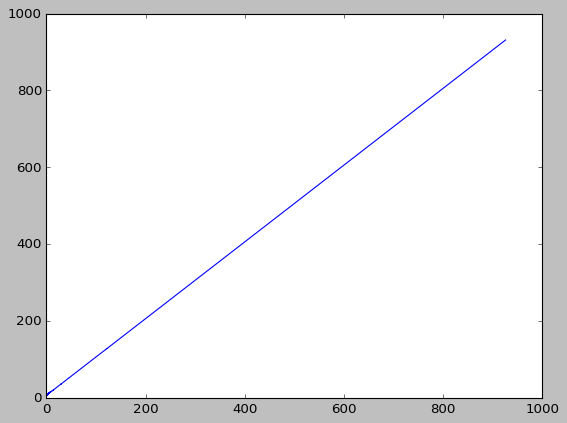

In [40]:
plt.plot(df['t'].values, df['latency'].values)

In [41]:
print(df.size)
print(df['t'][60:100])
print(df['latency'][500:10000])

17828307
749666    0.000433
749667    0.000436
749668    0.000440
749669    0.000587
749670    0.000592
749671    0.000595
749672    0.000598
749673    0.000601
749674    0.000604
749675    0.000607
749676    0.000611
749677    0.000613
749678    0.000617
749679    0.000620
749680    0.000623
749681    0.000627
749682    0.000630
749683    0.000633
749684    0.000636
749685    0.000639
749686    0.000643
749687    0.000646
749688    0.000649
749689    0.000657
749690    0.000660
749691    0.000664
749692    0.000667
749693    0.000670
749694    0.000673
749695    0.000676
749696    0.000679
749697    0.000682
749698    0.000685
749699    0.000688
749700    0.000691
749701    0.000694
749702    0.000702
749703    0.000705
749704    0.000709
749705    0.000712
Name: t, dtype: float64
750106    6.291646
750107    6.299112
750108    6.132273
750109    6.226476
750110    6.224349
            ...   
3773      6.476807
3774      6.374054
3775      6.372888
3776      6.417570
3777      6.43116